# Preprocesar y limpiar los datos :) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
df = pd.read_csv("popularity.csv")
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id,artist_popularity,artist_followers,extraction_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX,51,147674.0,2025-05-26
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26


In [33]:
df.shape 
df.columns 
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55950 entries, 0 to 55949
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mbid               55950 non-null  object 
 1   title              55950 non-null  object 
 2   artist             55950 non-null  object 
 3   duration_ms        55565 non-null  float64
 4   genre              55950 non-null  object 
 5   year               55950 non-null  int64  
 6   spotify_id         55950 non-null  object 
 7   popularity         55950 non-null  int64  
 8   release_date       55950 non-null  object 
 9   artist_id          4500 non-null   object 
 10  artist_popularity  4353 non-null   object 
 11  artist_followers   4053 non-null   float64
 12  extraction_date    4200 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 5.5+ MB


In [34]:
df['genre'].unique()

array(['rock', 'pop', 'hip hop', 'electronic'], dtype=object)

In [35]:
df['genre'].value_counts()

genre
rock          25410
pop           19168
hip hop        7397
electronic     3975
Name: count, dtype: int64

In [36]:
df.isnull().sum().sort_values(ascending=False)

artist_followers     51897
extraction_date      51750
artist_popularity    51597
artist_id            51450
duration_ms            385
mbid                     0
title                    0
artist                   0
genre                    0
year                     0
spotify_id               0
popularity               0
release_date             0
dtype: int64

### Eliminar DUplicados

In [28]:
df = df.drop_duplicates()

### Eliminar columnas con demasiodos nulos 

In [37]:
#Eliminar las columnas con muchos nulos
df = df.drop(columns=['artist_followers', 'extraction_date', 'artist_popularity'])

In [29]:
df

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id,artist_popularity,artist_followers,extraction_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX,51,147674.0,2025-05-26
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55945,0568ccbd-742b-4b61-a634-8735d2f919fb,Let Them Free,Miniman,290000.0,electronic,2016,629sev56ArrmGHed4VDAxN,7,2025-06-19,NaN,NaN,NaN,NaN
55946,a8bbb04a-59aa-42e1-ac2b-e208742001f7,N4,Lance Neptune,320301.0,electronic,2016,50VqWWJRCEXuVsqcbmRf42,1,2025-06-19,NaN,NaN,NaN,NaN
55947,82ae62af-ab2e-41be-af37-3c184d4ad13c,One,Few Nolder,440000.0,electronic,2016,02P4LWHeNnOZxFconGbDnm,19,2025-06-19,NaN,NaN,NaN,NaN
55948,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,Silent Running,Orchestral Manoeuvres in the Dark,222000.0,electronic,2016,5LmR198m65UcHCayrbYeuT,6,2025-06-19,NaN,NaN,NaN,NaN


### Eliminar nulos en columna duración con median 

In [43]:

df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())

In [39]:
df.isnull().sum().sort_values(ascending=False)

artist_id       51450
mbid                0
title               0
artist              0
duration_ms         0
genre               0
year                0
spotify_id          0
popularity          0
release_date        0
dtype: int64

In [40]:
df[df['artist_id'].isnull()][['artist', 'spotify_id']].sample(10)

,artist,spotify_id
55851,Beyond Sensory Experience,6VYDoA5kbHiVt4KZfgmmqq
55232,Indian Summer,68CDvrFLcQuTTESrs87fLC
4512,Rob Snarski,0zBvqEMByjnHCSnmI67FuT
6670,Amy Macdonald,2Zay7ozpb9MwMo8Z8Okk97
17755,Harem Scarem,1eC1DM5oypvu5XIcpkNcaM
5933,Grand Funk Railroad,06yvaF3FjnFO91VUa91PIW
21032,Sraigės efektas,64AGb6noZM6eY8ehpg0O6U
51605,Subculture Sage,0jg3Fu5ROzDHTutfNSGGF5
55717,Kolhoosi 13,1vNeNtMMWTUjvcUh6yez0i
16190,PJ Harvey,1wtaObxmfsSuIAGQMCHJzJ


### Eliminar duplicados

In [41]:
df = df.drop(columns=['artist_id'])

### Corrección de tipos de datos

In [44]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [46]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [47]:
df.dtypes

mbid                    object
title                   object
artist                  object
duration_ms            float64
genre                   object
year                     int64
spotify_id              object
popularity               int64
release_date    datetime64[ns]
dtype: object

In [69]:
df['duration_min'] = df['duration_ms'] / 60000
df = df.drop(columns=['duration_min'])


In [70]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [71]:
df.describe()

,duration_ms,year,popularity,release_date
count,55794.000000,55794.000000,55794.000000,55382
mean,236388.035864,2017.968921,25.615962,2024-04-29 17:33:48.225777408
min,3000.000000,2015.000000,0.000000,1962-12-10 00:00:00
25%,186936.500000,2016.000000,8.000000,2025-06-08 00:00:00
50%,222973.000000,2018.000000,22.000000,2025-06-12 00:00:00
75%,269000.000000,2020.000000,39.000000,2025-06-16 00:00:00
max,900000.000000,2022.000000,94.000000,2025-06-19 00:00:00
std,89988.205500,2.291127,20.941730,NaN


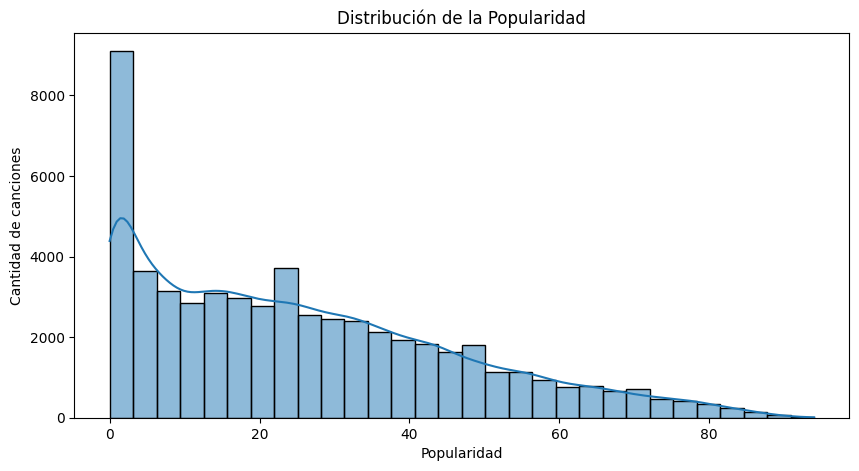

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribución de la Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de canciones")
plt.show()

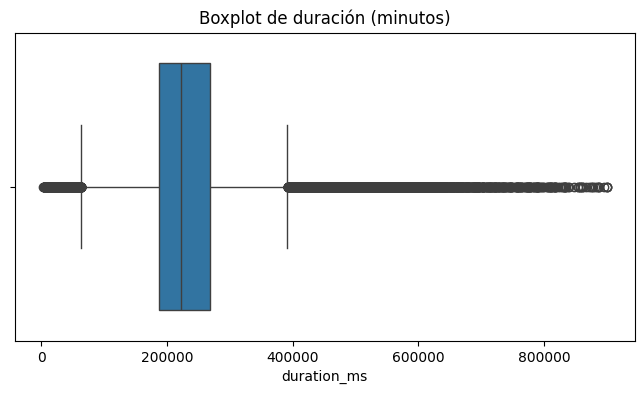

In [77]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_ms'])
plt.title("Boxplot de duración (minutos)")
plt.show()

In [78]:
df = df[df['duration_ms'] <= 900000]

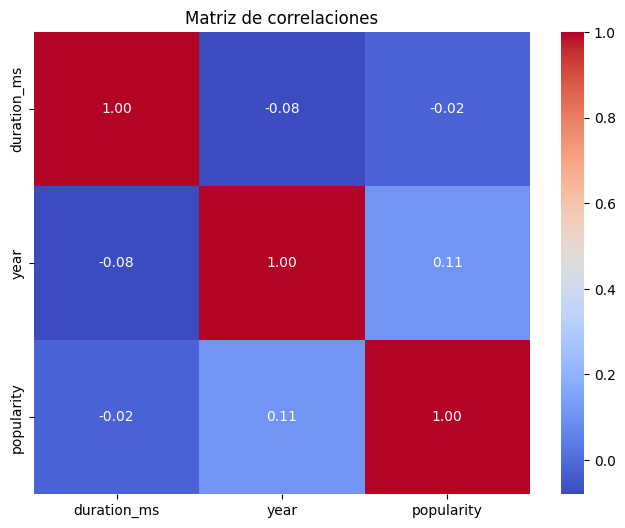

In [79]:
numeric_cols = ['duration_ms', 'year', 'popularity']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [80]:
text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [81]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [82]:
df['popularity'].describe()

count    55794.000000
mean        25.615962
std         20.941730
min          0.000000
25%          8.000000
50%         22.000000
75%         39.000000
max         94.000000
Name: popularity, dtype: float64

In [83]:
df['popularity'].value_counts().sort_index()

popularity
0     4544
1     1843
2     1405
3     1308
4     1165
      ... 
90      16
91       8
92       4
93       1
94       3
Name: count, Length: 95, dtype: int64

In [84]:
df.sort_values(by='popularity', ascending=False)[['title', 'artist', 'popularity']].head(20)

,title,artist,popularity
49414,all the stars,kendrick lamar,94
49743,all the stars,kendrick lamar,94
24004,iris,the goo goo dolls,94
15042,every breath you take,the police,93
25233,end of beginning,djo,92
48997,starboy,the weeknd,92
47988,the night we met,lord huron,92
36823,starboy,the weeknd,92
42921,as it was,harry styles,91
33904,shape of you,ed sheeran,91


In [85]:
top_by_genre = df.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,94
24004,rock,iris,the goo goo dolls,94
36823,pop,starboy,the weeknd,92
54396,electronic,latch,disclosure,85


In [86]:
 df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [88]:
columns_to_scale = ['duration_ms', 'year', 'popularity']
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [89]:
df_scaled.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.0,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.0,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.0,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.0,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.0,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27


In [91]:
top_by_genre = df_scaled.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,1.000000
24004,rock,iris,the goo goo dolls,1.000000
36823,pop,starboy,the weeknd,0.978723
54396,electronic,latch,disclosure,0.904255
